In [2]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from pathlib import Path
from cenpy import products

## Import Data

In [3]:
def geoify_df(station_df):
    #convert hr_df to geodataframe to plot the bike stations on map
    geometry = [Point(xy) for xy in zip(station_df.long, station_df.lat)]
    crs = 4326
    station_gdf = gpd.GeoDataFrame(station_df, crs=crs, geometry=geometry)
    return station_gdf

In [4]:
#get the 2010 census tracts in NYC
#https://s3.amazonaws.com/tripdata/index.html for the trip data
cenTract = gpd.read_file('../Data/NYC/CensusTracts/NYC_Census_Tracts_for_2010_US_Census/NYC_Census_Tracts_for_2010_US_Census.shp')

cur_nyc_df = geoify_df(pd.read_csv('../Data/NYC/stations/nyc_202101_stations.csv'))

In [5]:

#https://api.census.gov/data/2019/acs/acs5/variables.html variables for census
NYC = products.ACS(2019).from_place('New York City, NY', level='tract',
                                   variables = ['B08006_001E', 'B08006_002E', 'B08006_003E',
                                               'B08006_004E', 'B08006_005E', 'B08006_006E', 'B08006_007E',
                                                'B08006_008E', 'B08006_009E', 'B08006_0010E', 'B08006_0011E', 
                                                'B08006_0012E', 'B08006_0013E', 'B08006_0014E', 'B08006_0015E'])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: New York City, NY to New York city within layer Incorporated Places


In [6]:
NYC_demographics = products.ACS(2019).from_place('New York City, NY', level = 'tract',
                                                variables = ['B01003_001E', #total population
                                                            'B02001_002E', #white alone
                                                            'B02001_003E', #black or african american alone
                                                            'B02001_004E', #american indian / alaskan native
                                                            'B02001_005E' #asian alone
                                                            ])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: New York City, NY to New York city within layer Incorporated Places


In [7]:
NYC_vehicles = products.ACS(2019).from_place('New York City, NY', level = 'tract',
                                                variables = ['B08203_001E', #total
                                                            'B08203_002E', #no vehicle
                                                            'B08203_003E', #1 vehicle
                                                            'B08203_004E', #2 vehicles
                                                            'B08203_005E', #3 vehicles
                                                             'B08203_006E' #4+ vehicles
                                                            ])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: New York City, NY to New York city within layer Incorporated Places


In [8]:
NYC_income = products.ACS(2019).from_place('New York City, NY', level = 'tract',
                                          variables = ['B19013_001E'])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: New York City, NY to New York city within layer Incorporated Places


In [9]:
pgh_Test = products.ACS(2019).from_place('Pittsburgh, PA', 
                                         place_type='County Subdivision',
                                         level='tract', 
                                        variables = ['B01001A_001E'])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: Pittsburgh, PA to Pittsburgh city within layer County Subdivisions


## Visualize Data

In [10]:
NYC.head(1)

GEOID                                           geometry  \
0  36085017009  POLYGON ((-8259606.540 4945204.550, -8259551.5...   

   B08006_001E  B08006_002E  B08006_003E  B08006_004E  B08006_005E  \
0       1915.0       1532.0       1373.0        159.0        124.0   

   B08006_006E  B08006_007E  B08006_008E  B08006_009E state county   tract  
0         24.0         11.0        233.0        138.0    36    085  017009

In [11]:
cenTract.head(1)

OBJECTID CTLabel BoroCode       BoroName  CT2010 BoroCT2010 CDEligibil  \
0         1       9        5  Staten Island  000900    5000900          E   

  NTACode                                    NTAName  PUMA    Shape__Are  \
0    SI22  West New Brighton-New Brighton-St. George  3903  2.497010e+06   

    Shape__Len                                           geometry  
0  7729.016794  POLYGON ((-74.07921 40.64344, -74.07914 40.643...

In [12]:
NYC_demographics.head(1)

GEOID                                           geometry  \
0  36085017009  POLYGON ((-8259606.540 4945204.550, -8259551.5...   

   B01003_001E  B02001_002E  B02001_003E  B02001_004E  B02001_005E state  \
0       4485.0       4198.0          0.0          0.0        188.0    36   

  county   tract  
0    085  017009

## Transform Data

In [13]:
nyc_crs = NYC.to_crs("EPSG:4326")
nyc_crs.head(1)

GEOID                                           geometry  \
0  36085017009  POLYGON ((-74.19731 40.54326, -74.19681 40.543...   

   B08006_001E  B08006_002E  B08006_003E  B08006_004E  B08006_005E  \
0       1915.0       1532.0       1373.0        159.0        124.0   

   B08006_006E  B08006_007E  B08006_008E  B08006_009E state county   tract  
0         24.0         11.0        233.0        138.0    36    085  017009

In [14]:
nyc_d_crs = NYC_demographics.to_crs("EPSG:4326")
nyc_d_crs.head(1)

GEOID                                           geometry  \
0  36085017009  POLYGON ((-74.19731 40.54326, -74.19681 40.543...   

   B01003_001E  B02001_002E  B02001_003E  B02001_004E  B02001_005E state  \
0       4485.0       4198.0          0.0          0.0        188.0    36   

  county   tract  
0    085  017009

In [15]:
nyc_v_crs = NYC_vehicles.to_crs('EPSG:4326')
nyc_v_crs.head(1)

GEOID                                           geometry  \
0  36085017009  POLYGON ((-74.19731 40.54326, -74.19681 40.543...   

   B08203_001E  B08203_002E  B08203_003E  B08203_004E  B08203_005E  \
0       1558.0         54.0        522.0        718.0        151.0   

   B08203_006E state county   tract  
0        113.0    36    085  017009

In [16]:
nyc_in_crs = NYC_income.to_crs('EPSG:4326')
nyc_in_crs.head(1)

GEOID                                           geometry  \
0  36085017009  POLYGON ((-74.19731 40.54326, -74.19681 40.543...   

   B19013_001E state county   tract  
0      93125.0    36    085  017009

In [17]:
pgh_crs = pgh_Test.to_crs('EPSG:4326')
pgh_crs.head(1)

GEOID                                           geometry  \
0  42003270300  POLYGON ((-80.04299 40.47900, -80.04296 40.479...   

   B01001A_001E state county   tract  
0        1154.0    42    003  270300

## Visualize Commuting Behaviors

Text(0.5, 1.0, 'Percent of people who drove alone to work by census tract')

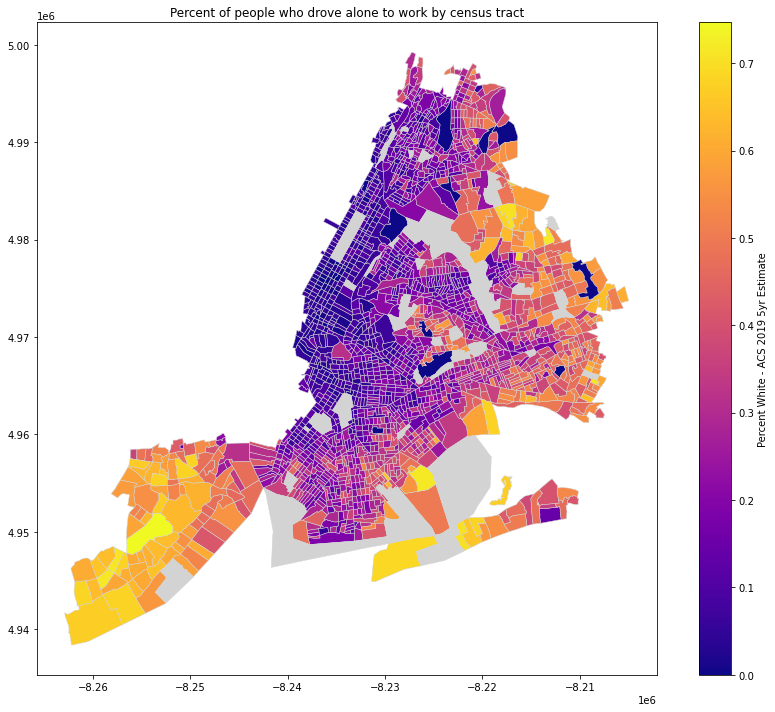

In [17]:
NYC['perc_alone'] = NYC['B08006_003E'] / NYC['B08006_001E']
ax = NYC.plot(column = "perc_alone", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5, 
              legend=True, legend_kwds={'label': "Percent White - ACS 2019 5yr Estimate",'orientation': "vertical"},
                  missing_kwds={"color": "lightgrey"})
# cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of people who drove alone to work by census tract")

Text(0.5, 1.0, 'Percent of people who drove alone to work by census tract & Citi Bike Stations')

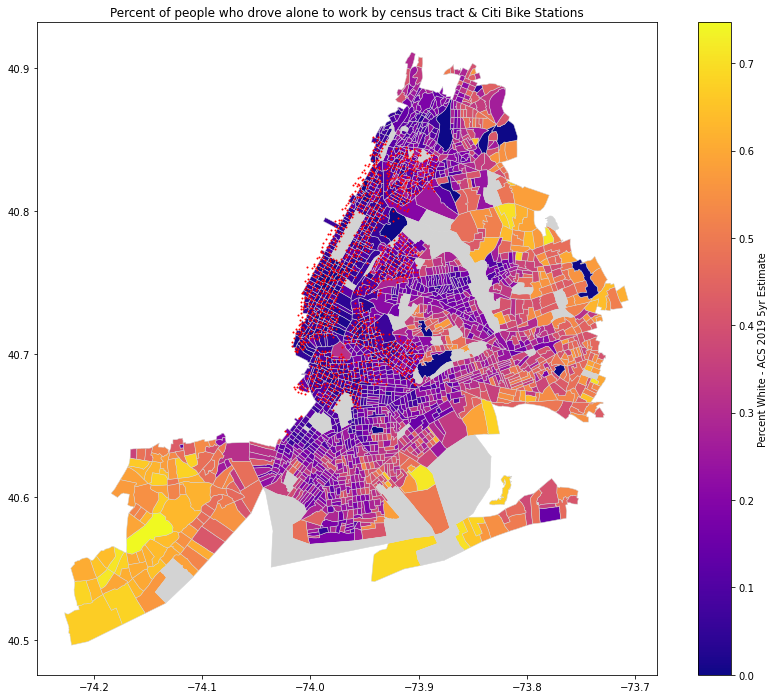

In [18]:
nyc_crs['perc_alone'] = nyc_crs['B08006_003E'] / nyc_crs['B08006_001E']
axcrs = nyc_crs.plot(column = "perc_alone", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5,
                    legend=True, legend_kwds={'label': "Percent White - ACS 2019 5yr Estimate",'orientation': "vertical"},
                  missing_kwds={"color": "lightgrey"})
cur_nyc_df.plot(ax=axcrs, color="Red", markersize=1)
plt.title("Percent of people who drove alone to work by census tract & Citi Bike Stations")

Text(0.5, 1.0, 'Percent of people who take public transit (bus, subway, train) to work by census tract')

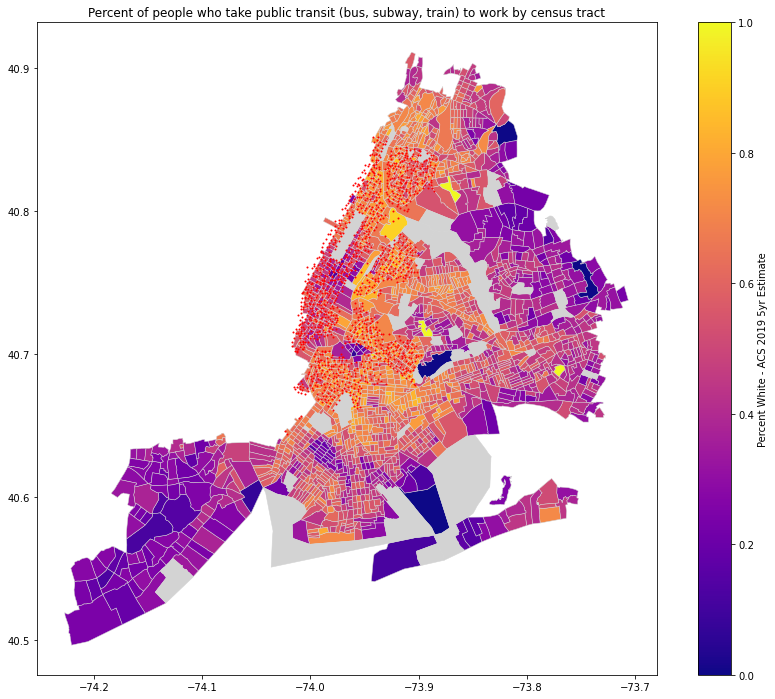

In [19]:
nyc_crs['perc_public'] = nyc_crs['B08006_008E'] / nyc_crs['B08006_001E']
ax = nyc_crs.plot(column = "perc_public", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5,
                 legend=True, legend_kwds={'label': "Percent White - ACS 2019 5yr Estimate",'orientation': "vertical"},
                  missing_kwds={"color": "lightgrey"})
cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of people who take public transit (bus, subway, train) to work by census tract")

## Visualize Demographics

Text(0.5, 1.0, 'Percent of race (white) by census tract in relation to Citi Bike Stations')

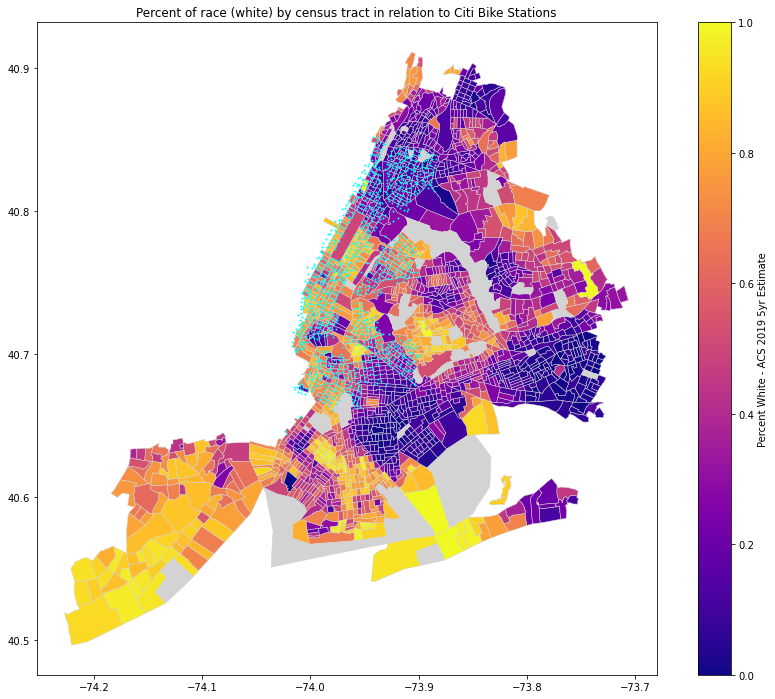

In [20]:
nyc_d_crs['perc_white'] = nyc_d_crs['B02001_002E'] / nyc_d_crs['B01003_001E']
ax = nyc_d_crs.plot(column = "perc_white", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5,
                   legend=True, legend_kwds={'label': "Percent White - ACS 2019 5yr Estimate",
                                                                     'orientation': "vertical"}, missing_kwds={"color": "lightgrey"})
cur_nyc_df.plot(ax=ax, color="cyan", markersize=1)
plt.title("Percent of race (white) by census tract in relation to Citi Bike Stations")

Text(0.5, 1.0, 'Percent of race (african american or black) by census tract in relation to Citi Bike Stations')

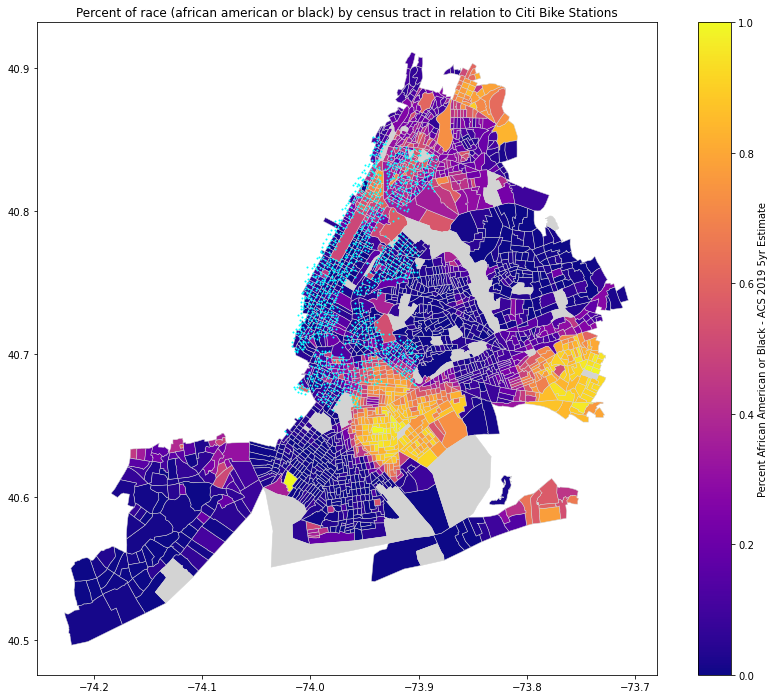

In [21]:
nyc_d_crs['perc_black'] = nyc_d_crs['B02001_003E'] / nyc_d_crs['B01003_001E']
ax = nyc_d_crs.plot(column = "perc_black", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5, legend=True, 
                    legend_kwds={'label': "Percent African American or Black - ACS 2019 5yr Estimate",
                                                                     'orientation': "vertical"}, missing_kwds={"color": "lightgrey"})
cur_nyc_df.plot(ax=ax, color="cyan", markersize=1)
plt.title("Percent of race (african american or black) by census tract in relation to Citi Bike Stations")

Text(0.5, 1.0, 'Percent of race (native american) by census tract in relation to Citi Bike Stations')

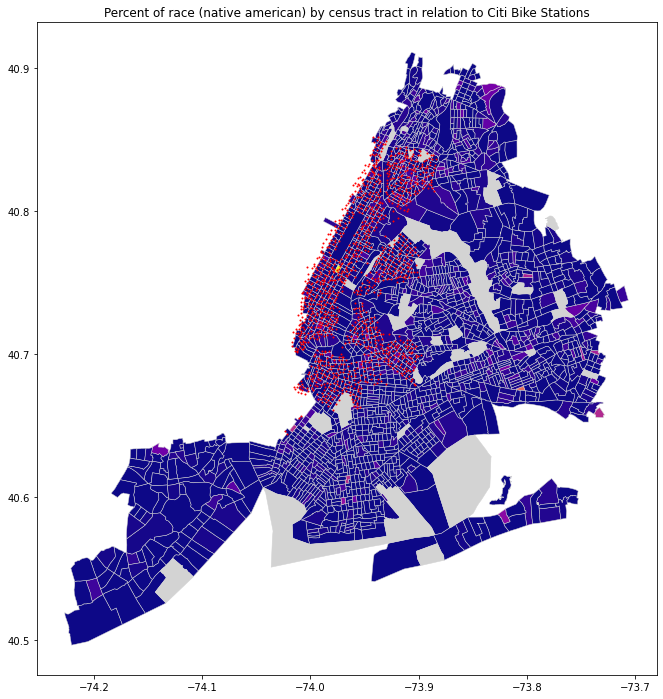

In [22]:
nyc_d_crs['perc_native'] = nyc_d_crs['B02001_004E'] / nyc_d_crs['B01003_001E']
ax = nyc_d_crs.plot(column = "perc_native", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5,
                   legend_kwds={'label': "Percent African American or Black - ACS 2019 5yr Estimate",
                                                                     'orientation': "vertical"}, missing_kwds={"color": "lightgrey"})
cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of race (native american) by census tract in relation to Citi Bike Stations")

Text(0.5, 1.0, 'Percent of race (asian) by census tract in relation to Citi Bike Stations')

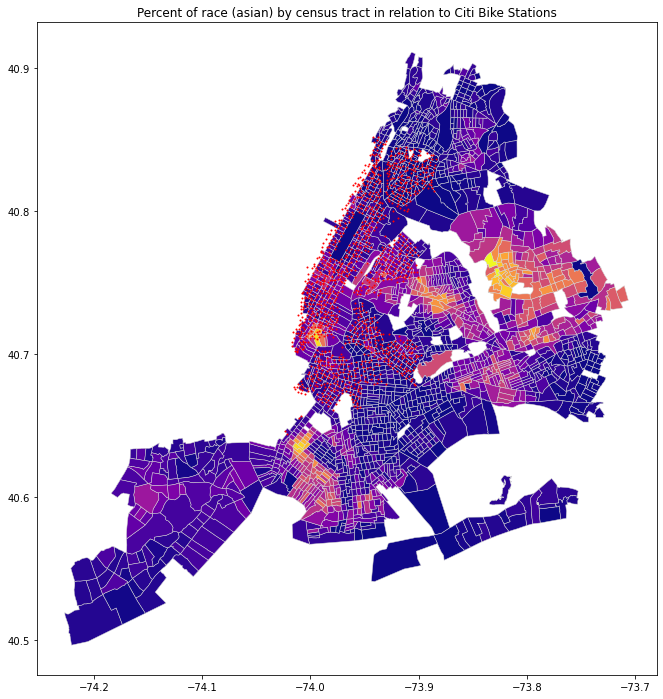

In [62]:
nyc_d_crs['perc_asian'] = nyc_d_crs['B02001_005E'] / nyc_d_crs['B01003_001E']
ax = nyc_d_crs.plot(column = "perc_asian", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of race (asian) by census tract in relation to Citi Bike Stations")

Text(0.5, 1.0, 'Percent of race (asian, black, native american) by census tract in relation to Citi Bike Stations')

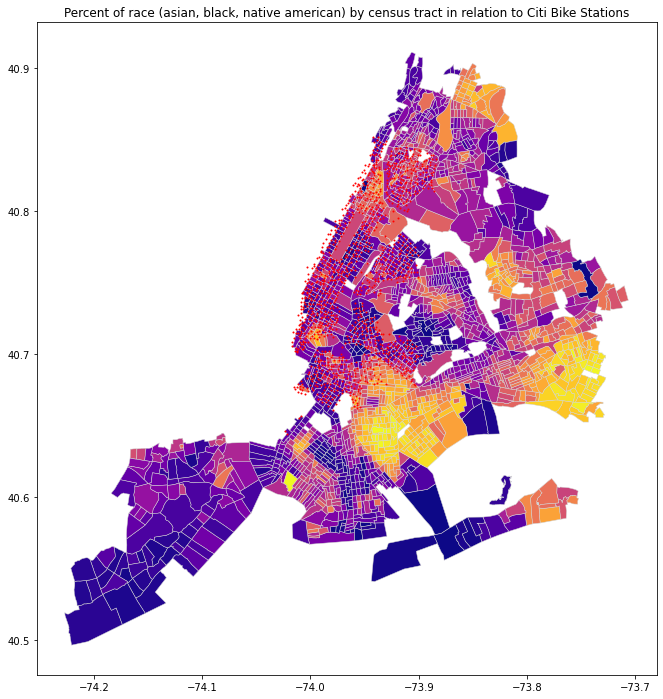

In [63]:
nyc_d_crs['perc_minority'] = (nyc_d_crs['B02001_003E'] + nyc_d_crs['B02001_004E'] + nyc_d_crs['B02001_005E'])/ nyc_d_crs['B01003_001E']
ax = nyc_d_crs.plot(column = "perc_minority", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of race (asian, black, native american) by census tract in relation to Citi Bike Stations")

## Visualize Vehicle Ownership

Text(0.5, 1.0, "Percent of people who don't own at least one vehicle by census tract in relation to Citi Bike Stations")

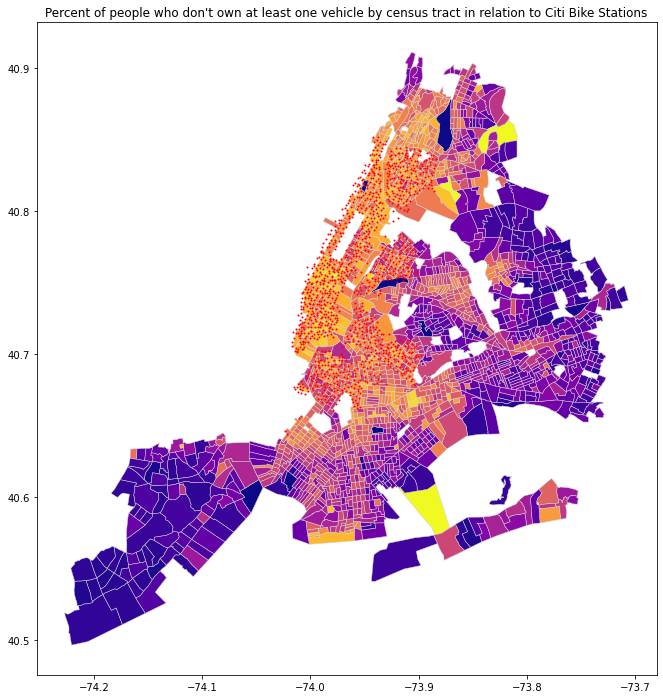

In [64]:
#B08203_001E
nyc_v_crs['nov'] = nyc_v_crs['B08203_002E']/ nyc_v_crs['B08203_001E']
ax = nyc_v_crs.plot(column = "nov", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of people who don't own at least one vehicle by census tract in relation to Citi Bike Stations")

Text(0.5, 1.0, "Percent of people who don't own at least one vehicle by census tract in relation to Citi Bike Stations")

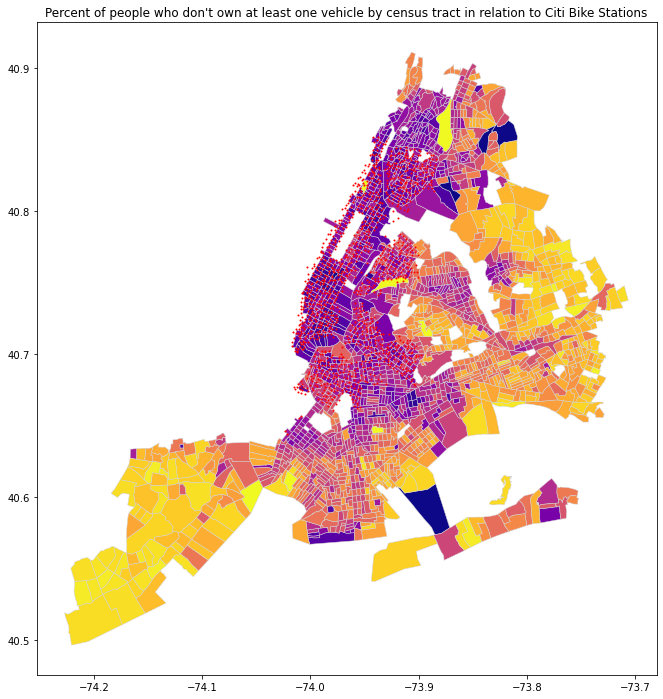

In [65]:
nyc_v_crs['vehicles'] = (nyc_v_crs['B08203_003E'] + nyc_v_crs['B08203_004E'] + nyc_v_crs['B08203_005E'] + nyc_v_crs['B08203_006E'])/ nyc_v_crs['B08203_001E']
ax = nyc_v_crs.plot(column = "vehicles", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=ax, color="Red", markersize=1)
plt.title("Percent of people who don't own at least one vehicle by census tract in relation to Citi Bike Stations")

# Visualize Income - Median Household Income

Text(0.5, 1.0, 'Median Household Income')

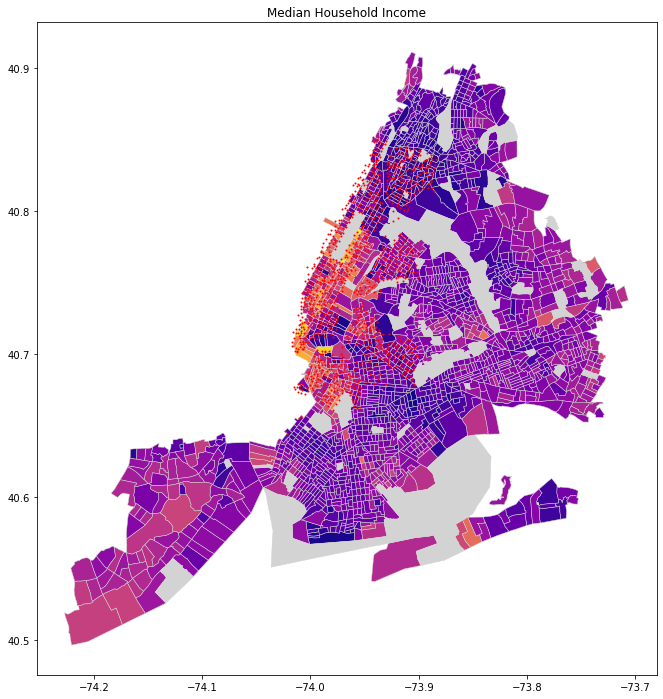

In [23]:
axcrs = nyc_in_crs.plot(column = "B19013_001E", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5,
                       legend_kwds={'label': "Percent African American or Black - ACS 2019 5yr Estimate",
                                                                     'orientation': "vertical"}, missing_kwds={"color": "lightgrey"})
cur_nyc_df.plot(ax=axcrs, color="Red", markersize=1)
plt.title("Median Household Income")

# Breaking Region up into Grids

<AxesSubplot:>

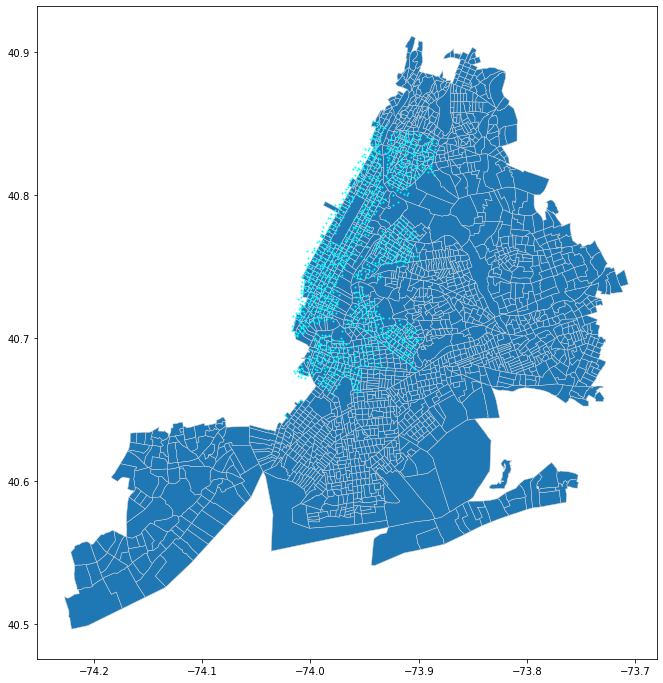

In [18]:
axcrs = nyc_crs.plot(figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df.plot(ax=axcrs, color="cyan", markersize=1)

In [61]:
import csv
import shapely
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import numpy as np
from shapely.ops import transform
import pyproj
from functools import partial

# total area for the grid
xmin, ymin, xmax, ymax= nyc_crs.total_bounds

# how many cells across and down
n_cells=140
cell_size = (xmax-xmin)/n_cells
print(cell_size)

from pyproj import Proj
# projection of the grid
crs = "+proj=lcc +lat_1=40.96666666666667 +lat_2=39.93333333333333 +lat_0=39.33333333333334 +lon_0=-77.75 +x_0=600000 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"
# crs = 4326
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+(cell_size), cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append(shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)
map_points = gpd.GeoDataFrame()
cell["centroid"] = cell["geometry"].centroid
map_points["geometry"] = cell["geometry"].centroid

print(cell.loc[0]['geometry'].area)

0.003717113789660991
1.3816934925296196e-05


<AxesSubplot:>

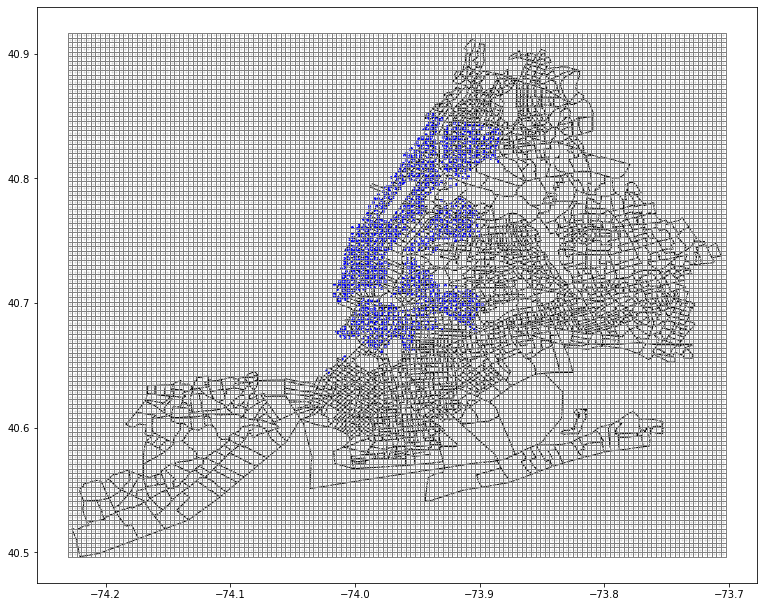

In [62]:
#Use matplotlib to plot the pittsburgh neighborhoods
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.set_position([0,0,1,1])   # Puts axis to edge of figure
lims = plt.axis('equal')
ax.set_aspect('equal')
nyc_crs.plot(ax = ax, color='white', edgecolor='black')

cur_nyc_df.plot(ax=ax, markersize=4, color='blue')
map_points.plot(ax=ax, markersize=1, color='lightgrey')
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
# ax.axis('off')

In [66]:
cell.loc[0]['geometry']

POLYGON ((-74.23062707463977 40.49648799554183, -74.23062707463977 40.50020510933149, -74.22690996085011 40.50020510933149, -74.22690996085011 40.49648799554183, -74.23062707463977 40.49648799554183))


In [67]:
print(cell.loc[0]['geometry'].bounds[0]) #x1
print(cell.loc[0]['geometry'].bounds[1]) #y1
print(cell.loc[0]['geometry'].bounds[2]) #x2
print(cell.loc[0]['geometry'].bounds[3]) #y2

-74.23062707463977
40.49648799554183
-74.22690996085011
40.50020510933149


<AxesSubplot:>

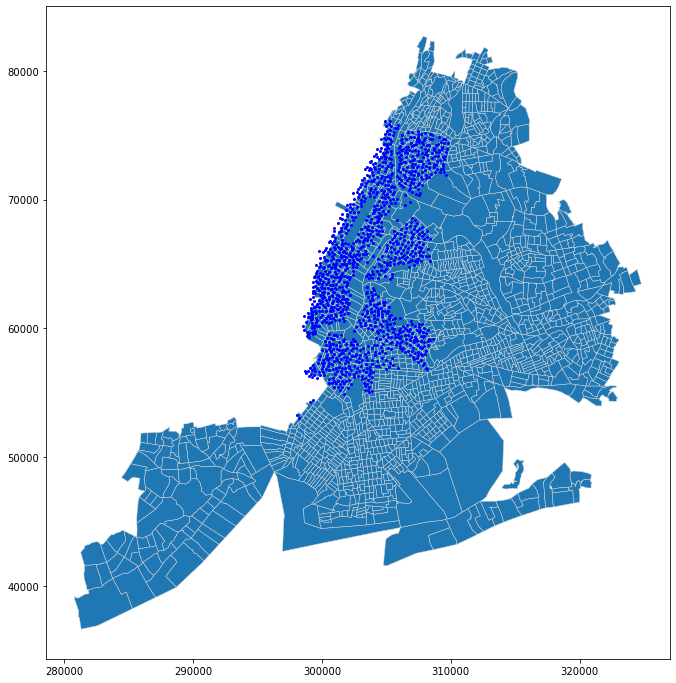

In [74]:
nyc_meters = nyc_crs.to_crs("EPSG:32118")
cur_nyc_df_m = cur_nyc_df.to_crs("EPSG:32118")
axcrsm = nyc_meters.plot(figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
cur_nyc_df_m.plot(ax=axcrsm, markersize=4, color='blue')

In [53]:
nyc_meters

GEOID                                           geometry  \
0     36085017009  POLYGON ((283285.256 41837.932, 283327.194 418...   
1     36085017012  POLYGON ((284643.474 42245.425, 284736.977 424...   
2     36085017011  POLYGON ((285072.391 42008.798, 285091.857 420...   
3     36085027302  POLYGON ((287668.591 47015.673, 287672.095 470...   
4     36085021300  POLYGON ((287577.926 51614.946, 287592.327 516...   
...           ...                                                ...   
2056  36081065000  POLYGON ((321073.113 55900.281, 321153.956 560...   
2057  36081055800  POLYGON ((321565.246 61807.913, 321626.524 618...   
2058  36081063200  POLYGON ((321569.029 56563.555, 321649.362 567...   
2059  36081138502  POLYGON ((320331.135 66395.074, 320380.167 664...   
2060  36081157101  POLYGON ((323094.932 63793.752, 323154.398 638...   

      B08006_001E  B08006_002E  B08006_003E  B08006_004E  B08006_005E  \
0          1915.0       1532.0       1373.0        159.0        124.0   
1          1835.0       1397.0       1247.0        150.0         79.0   
2          2238.0       1561.0       1366.0        195.0        122.0   
3          1587.0       1305.0       1066.0        239.0        160.0   
4          1942.0       1126.0       1009.0        117.0        108.0   
...           ...          ...          ...          ...          ...   
2056       1319.0        935.0        852.0         83.0         65.0   
2057        889.0        485.0        445.0         40.0         40.0   
2058       1342.0        693.0        662.0         31.0         25.0   
2059         15.0          0.0          0.0          0.0          0.0   
2060       4370.0       2780.0       2242.0        538.0        236.0   

      B08006_006E  B08006_007E  B08006_008E  B08006_009E state county   tract  
0            24.0         11.0        233.0        138.0    36    085  017009  
1            56.0         15.0        346.0        247.0    36    085  017012  
2            62.0         11.0        611.0        388.0    36    085  017011  
3            24.0         55.0        214.0        156.0    36    085  027302  
4             9.0          0.0        648.0        518.0    36    085  021300  
...           ...          ...          ...          ...   ...    ...     ...  
2056         18.0          0.0        377.0        151.0    36    081  065000  
2057          0.0          0.0        345.0         77.0    36    081  055800  
2058          6.0          0.0        629.0        282.0    36    081  063200  
2059          0.0          0.0          0.0          0.0    36    081  138502  
2060        134.0        168.0       1376.0        534.0    36    081  157101  

[2061 rows x 14 columns]

In [76]:
# total area for the grid
xmin, ymin, xmax, ymax= nyc_meters.total_bounds

# how many cells across and down
n_cells=140
cell_size = (xmax-xmin)/n_cells
print(cell_size)

from pyproj import Proj
# projection of the grid
# crs = "+proj=lcc +lat_1=40.96666666666667 +lat_2=39.93333333333333 +lat_0=39.33333333333334 +lon_0=-77.75 +x_0=600000 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"
crs = 32118
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+(cell_size), cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append(shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)
map_points = gpd.GeoDataFrame()
cell["centroid"] = cell["geometry"].centroid
map_points["geometry"] = cell["geometry"].centroid

print(cell.loc[0]['geometry'].area)

314.4240384673384
98862.47596611323


<AxesSubplot:>

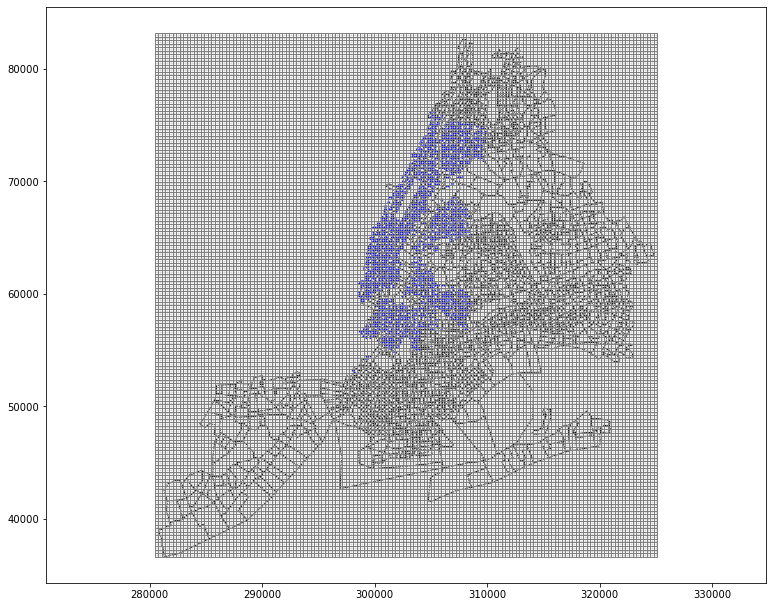

In [98]:
#Use matplotlib to plot the pittsburgh neighborhoods
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.set_position([0,0,1,1])   # Puts axis to edge of figure
lims = plt.axis('equal')
ax.set_aspect('equal')
nyc_meters.plot(ax = ax, color='white', edgecolor='black')

cur_nyc_df_m.plot(ax=ax, markersize=4, color='blue')
map_points.plot(ax=ax, markersize=1, color='lightgrey')
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
# ax.axis('off')

In [78]:
cell['stations'] = 0 #number of stations in that cell
cell['ids'] = None
cell['tractce10'] = ''

In [80]:
# cur_nyc_df_m = cur_nyc_df_m.drop(columns=['Unnamed: 0'])
cur_nyc_df_m.head()

station_id                station_name        lat       long  \
0        3581  Underhill Ave & Lincoln Pl  40.674012 -73.967146   
1        3144          E 81 St & Park Ave  40.776777 -73.959010   
2         534     Water - Whitehall Plaza  40.702551 -74.012723   
3         319        Fulton St & Broadway  40.711066 -74.009447   
4        3294          E 91 St & Park Ave  40.783502 -73.955327   

                       geometry  
0  POINT (302777.775 56339.031)  
1  POINT (303460.320 67751.169)  
2  POINT (298924.718 59507.708)  
3  POINT (299201.716 60453.286)  
4  POINT (303770.826 68498.080)

In [81]:
for row in range(len(cur_nyc_df_m)):
    stationid = cur_nyc_df_m.loc[row]['station_id']
    for cellnum in range(len(cell)):
        ids = set()
        if cur_nyc_df_m.loc[row]["geometry"].within(cell.loc[cellnum]["geometry"]):
            cell.at[cellnum,'stations'] += 1
            ids.add(stationid)
        if len(ids) >0:
            print(ids)
            print(cellnum)
        cell.at[cellnum, 'ids'] = ids

{3581}
10422
{3144}
10902
{534}
8656
{319}
8807
{3294}
11053
{3372}
11048
{3301}
10464
{500}
9861
{3739}
9112
{356}
9845
{536}
10150
{317}
9996
{447}
9862
{3131}
10751
{3414}
10129
{3080}
10879
{3690}
8808
{469}
9862
{362}
9710
{3518}
11358
{484}
10007
{4232}
9859
{533}
9710
{3637}
10573
{301}
9847
{540}
9855
{3381}
9387
{3520}
11208
{3135}
10900
{3296}
11200
{3553}
10911
{3156}
11047
{497}
9556
{2021}
9712
{438}
9849
{477}
9563
{504}
9999
{3072}
11321
{4083}
12552
{510}
10009
{454}
10599
{4071}
11515
{508}
9418
{3236}
9416
{2003}
9999
{151}
9255
{468}
10010
{3391}
11647
{3506}
11651
{3808}
11634
{3318}
11349
{3300}
10123
{499}
10012
{474}
9707
{3641}
9706
{3916}
9102
{3093}
10881
{3987}
12839
{3491}
11798
{545}
10148
{435}
9410
{4072}
10008
{3664}
8810
{3351}
11498
{3773}
12061
{340}
9696
{445}
9997
{161}
9258
{3549}
10720
{4110}
10144
{494}
9264
{450}
9713
{224}
8955
{3500}
11354
{320}
8958
{3671}
11050
{324}
9984
{238}
8816
{3170}
10313
{3443}
10009
{364}
10723
{2000}
9692
{3323}
10

In [84]:
for row in range(len(nyc_meters)):
    for cellnum in range(len(cell)):
        if cell.loc[cellnum]["centroid"].within(nyc_meters.loc[row]["geometry"]):
            cell.at[cellnum,'tractce10'] = nyc_meters.loc[row]['tract']

In [91]:
cell['stations'] = cell.stations.astype(float)
cell_filtered = cell[cell['stations'] > 0.0]
cell_filtered

geometry  \
8192   POLYGON ((297749.526 52998.652, 297749.526 533...   
8340   POLYGON ((298063.950 52998.652, 298063.950 533...   
8499   POLYGON ((298378.374 56457.317, 298378.374 567...   
8509   POLYGON ((298378.374 59601.557, 298378.374 599...   
8510   POLYGON ((298378.374 59915.981, 298378.374 602...   
...                                                  ...   
13733  POLYGON ((309383.215 73436.215, 309383.215 737...   
13734  POLYGON ((309383.215 73750.639, 309383.215 740...   
13736  POLYGON ((309383.215 74379.487, 309383.215 746...   
13737  POLYGON ((309383.215 74693.911, 309383.215 750...   
13883  POLYGON ((309697.639 74065.063, 309697.639 743...   

                           centroid  stations ids tractce10  
8192   POINT (297906.738 53155.864)       1.0  {}            
8340   POINT (298221.162 53155.864)       1.0  {}    002200  
8499   POINT (298535.586 56614.529)       1.0  {}            
8509   POINT (298535.586 59758.769)       1.0  {}            
8510   POINT (298535.586 60073.193)       1.0  {}            
...                             ...       ...  ..       ...  
13733  POINT (309540.427 73593.427)       1.0  {}    012300  
13734  POINT (309540.427 73907.851)       1.0  {}    015700  
13736  POINT (309540.427 74536.699)       2.0  {}    016100  
13737  POINT (309540.427 74851.123)       1.0  {}    036502  
13883  POINT (309854.851 74222.275)       1.0  {}    016100  

[910 rows x 5 columns]

In [101]:
geo_cells = gpd.GeoDataFrame(cell, crs='EPSG:32118', geometry='geometry')
geo_cells.head(2)

geometry  \
0  POLYGON ((280456.203 36648.602, 280456.203 369...   
1  POLYGON ((280456.203 36963.026, 280456.203 372...   

                       centroid  stations ids tractce10  
0  POINT (280613.415 36805.814)       0.0  {}            
1  POINT (280613.415 37120.238)       0.0  {}

Text(0.5, 1.0, 'Number of stations in each grid cell')

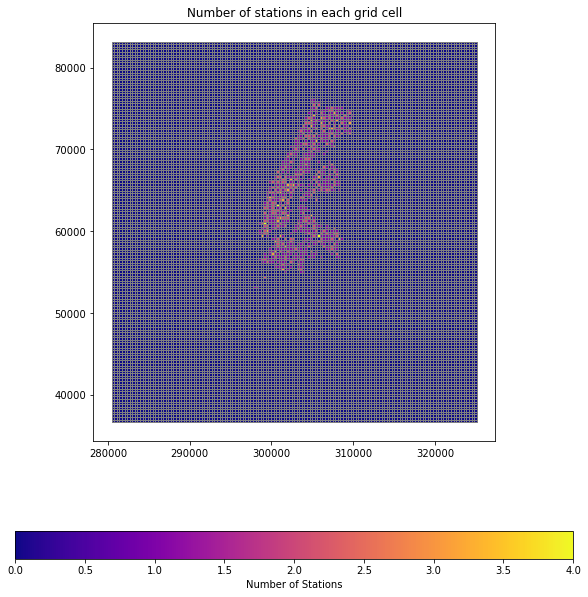

In [102]:
geo_cells.plot(column="stations", cmap='plasma',edgecolor = "grey", figsize=(10,11),  
                    legend = True, legend_kwds={'label': "Number of Stations",'orientation': "horizontal"})
plt.title("Number of stations in each grid cell")

In [99]:
geo

geometry  \
8192   POLYGON ((297749.526 52998.652, 297749.526 533...   
8340   POLYGON ((298063.950 52998.652, 298063.950 533...   
8499   POLYGON ((298378.374 56457.317, 298378.374 567...   
8509   POLYGON ((298378.374 59601.557, 298378.374 599...   
8510   POLYGON ((298378.374 59915.981, 298378.374 602...   
...                                                  ...   
13733  POLYGON ((309383.215 73436.215, 309383.215 737...   
13734  POLYGON ((309383.215 73750.639, 309383.215 740...   
13736  POLYGON ((309383.215 74379.487, 309383.215 746...   
13737  POLYGON ((309383.215 74693.911, 309383.215 750...   
13883  POLYGON ((309697.639 74065.063, 309697.639 743...   

                           centroid  stations ids tractce10  
8192   POINT (297906.738 53155.864)       1.0  {}            
8340   POINT (298221.162 53155.864)       1.0  {}    002200  
8499   POINT (298535.586 56614.529)       1.0  {}            
8509   POINT (298535.586 59758.769)       1.0  {}            
8510   POINT (298535.586 60073.193)       1.0  {}            
...                             ...       ...  ..       ...  
13733  POINT (309540.427 73593.427)       1.0  {}    012300  
13734  POINT (309540.427 73907.851)       1.0  {}    015700  
13736  POINT (309540.427 74536.699)       2.0  {}    016100  
13737  POINT (309540.427 74851.123)       1.0  {}    036502  
13883  POINT (309854.851 74222.275)       1.0  {}    016100  

[910 rows x 5 columns]